#Import TensorFlow

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import random
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.15.0


#Load Dataset

Keras provides this nice API here specifically for MNIST, but in reality data handling is an extremely complex field on its own

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# Example Image

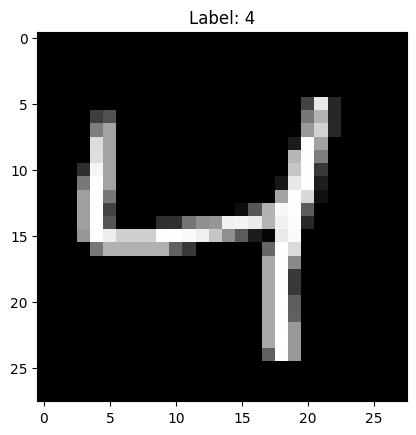

In [ ]:
# random image
index = random.randint(0, 100)

plt.imshow(x_train[index], cmap='gray')  # MNIST images are grayscale
plt.title(f'Label: {y_train[index]}')
plt.show()


#### Example using CNN model, more complex but also works

In [ ]:
# Reshape images to fit the CNN input requirements
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))


In [ ]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 15s 5ms/step - loss: 0.1455 - accuracy: 0.9557 - val_loss: 0.0493 - val_accuracy: 0.9828
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0471 - accuracy: 0.9850 - val_loss: 0.0373 - val_accuracy: 0.9871
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0332 - accuracy: 0.9900 - val_loss: 0.0373 - val_accuracy: 0.9878
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0257 - accuracy: 0.9919 - val_loss: 0.0343 - val_accuracy: 0.9900
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0196 - accuracy: 0.9941 - val_loss: 0.0351 - val_accuracy: 0.9897


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

test_loss, test_acc

313/313 - 1s - loss: 0.0351 - accuracy: 0.9897 - 605ms/epoch - 2ms/step


(0.035113923251628876, 0.9897000193595886)